In [1]:
#
import pandas as pd
import numpy as np

In [2]:
#
% matplotlib inline 

In [102]:
#
train = pd.read_csv("train_mod_csv")

In [4]:
#
test = pd.read_csv("test_mod_csv")

In [148]:
train.head(5)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_years,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Item_type_combined_0,Item_type_combined_1,Item_type_combined_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,14,...,0,1,0,0,1,0,0,1,0,0
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,4,...,0,1,0,1,0,0,0,0,1,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,14,...,0,1,0,0,1,0,0,1,0,0
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,train,15,...,0,1,0,0,1,0,1,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,train,26,...,1,0,0,0,0,1,0,1,0,0


In [5]:
## Base line model
#
mean_sales = train.Item_Outlet_Sales.mean()

In [6]:
#
base1 = test[['Item_Identifier','Outlet_Identifier']]


In [25]:
#
base1['Item_Outlet_Sales'] = mean_sales

C:\Users\sreeram\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
#
base1.to_csv("baseline.csv",index = False)

In [7]:
## Function to fit multiple models
#
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [8]:
#
from sklearn import cross_validation,metrics

C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
def modelfit(alg,dtrain,dtest,predictors,target,IDcol,filename):
    
    ## Fit algorithm on the data
    alg.fit(dtrain[predictors],dtrain[target])
    
    ## Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    ## Perform cross validation
    cv_score = cross_validation.cross_val_Score(alg, dtrain[predictors],dtrain[target], cv =20, scoring = 'mean_squared_error')
    
    cv_score = np.sqrt(np.abs(cv_score))
    
    ## Print model report
    print ("\nModel Report")
    RMSE = np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    print(RMSE)
    CV_mean = (np.mean(cv_score))
    CV_std = np.std(cv_score)
    CV_min = np.min(cv_score)
    CV_max = np.max(cv_score)
    print(CV_mean,CV_std,CV_min,CV_max)
    
    # Predict on test data
    dtest[target] = alg.predict(dtest[predictors])
    
    ## Write to csv
    
    dtest.to_csv('filename.csv', columns = ['Item_Identifer','Outlet_Identifier','target'], index = False)
    
    
                                                                                                                            

In [10]:
# Linear Regression Model
#
from sklearn.linear_model import LinearRegression, Ridge


In [72]:
predictors = train[['Item_Visibility','Item_MRP','Outlet_Location_Type_0','Outlet_Location_Type_1',
                    'Outlet_Location_Type_2','Outlet_Size_0',
                    'Outlet_Size_1','Outlet_Size_2', 'Item_type_combined_0','Item_type_combined_1','Item_type_combined_2'
                   ] ]

SyntaxError: invalid syntax (<ipython-input-72-13a90487ec5c>, line 4)

In [73]:
# Linear Regression - 1
#


alg1 = LinearRegression(normalize = True)
z = train['Item_Outlet_Sales']

In [74]:
## Fit algorithm on the data
alg1.fit(predictors,z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [75]:
## Predict training set
train_predictions = alg1.predict(predictors)

SyntaxError: invalid syntax (<ipython-input-68-e4390b9ec1fb>, line 1)

In [76]:
## Perform cross validation
cv_score = cross_validation.cross_val_score(alg1, predictors,z, cv =20, scoring = 'mean_squared_error')
    
    

C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\l

In [77]:
cv_score = np.sqrt(np.abs(cv_score))

In [78]:
## Print model report
print ("\nModel Report")
RMSE = np.sqrt(metrics.mean_squared_error(z.values,train_predictions))
print(RMSE)
    


Model Report
1372.29058025


In [79]:
CV_mean = (np.mean(cv_score))
CV_std = np.std(cv_score)
CV_min = np.min(cv_score)
CV_max = np.max(cv_score)
print(CV_mean,CV_std,CV_min,CV_max)

1372.74053814 54.5219740948 1291.10809929 1494.82932819


In [82]:
alg1.coef_

array([ -3.91697280e+03,   1.55517980e+01,   1.55394635e+15,
         1.55394635e+15,   1.55394635e+15,  -4.26355495e+14,
        -4.26355495e+14,  -4.26355495e+14,   7.19430481e+16,
         7.19430481e+16,   7.19430481e+16])

In [83]:
## PCA
#Import Library
from sklearn import decomposition

In [85]:
train.shape
## #default value of k =min(n_sample, n_features)

(8523, 25)

In [104]:
pca= decomposition.PCA(n_components= 10)

In [105]:
# Reduced the dimension of training dataset using PCA
train_reduced = pca.fit_transform(predictors)

In [110]:
train_reduced

array([[  1.08816426e+02,   1.19346772e-01,  -1.84630461e-02, ...,
         -5.18917950e-02,  -1.57502999e-15,   1.75190029e-17],
       [ -9.27240131e+01,  -7.93187786e-01,  -2.44529628e-01, ...,
         -4.75474493e-02,   6.34934159e-16,   7.92341760e-16],
       [  6.25232305e-01,   1.27971883e-01,  -2.10190057e-02, ...,
         -5.14378958e-02,   1.61288647e-14,  -3.58597368e-16],
       ..., 
       [ -5.58703686e+01,   8.69553702e-01,   4.26708293e-01, ...,
         -2.45907426e-02,  -7.12774553e-17,  -1.76695233e-17],
       [ -3.78595626e+01,  -7.94988259e-01,  -2.28963561e-01, ...,
          7.34042748e-02,   1.41082732e-16,   6.25737403e-17],
       [ -6.55260642e+01,   1.17211392e+00,  -5.12956985e-01, ...,
         -2.69034847e-02,   8.14888116e-17,  -6.93835403e-17]])

In [116]:
alg1.coef_.shape

(11,)

In [117]:
predictors.shape

(8523, 11)

In [118]:
predictors1 = [x for x in predictors.columns]

In [119]:
coef1 = pd.Series(alg1.coef_, predictors1).sort_values()

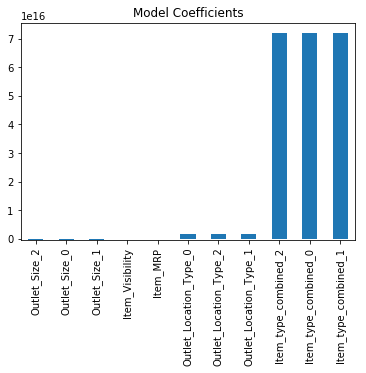

In [120]:
coef1.plot(kind='bar', title='Model Coefficients')

In [121]:
predictors_test =  test[['Item_Visibility','Item_MRP','Outlet_Location_Type_0','Outlet_Location_Type_1',
                    'Outlet_Location_Type_2','Outlet_Size_0',
                    'Outlet_Size_1','Outlet_Size_2', 'Item_type_combined_0','Item_type_combined_1','Item_type_combined_2'
                   ] ]

In [122]:
pred = alg1.predict(predictors_test)

In [124]:
test['Item_Outlet_Sales'] = pred

In [125]:
test.to_csv("LinReg.csv", columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],index = False)

In [130]:
## Ridge Regression -2

predictors = train[['Item_MRP',
       'Item_Visibility', 'Item_Weight', 
       'Outlet_years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_type_combined_0',
       'Item_type_combined_1', 'Item_type_combined_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3']]


In [131]:
predictors_test = test[['Item_MRP',
       'Item_Visibility', 'Item_Weight', 
       'Outlet_years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Item_type_combined_0',
       'Item_type_combined_1', 'Item_type_combined_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3']]

In [132]:
z = train['Item_Outlet_Sales']

In [133]:
alg2 = Ridge(alpha = 0.05,normalize = True)

In [134]:
alg2.fit(predictors,z)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [135]:
train_predictions = alg2.predict(predictors)

In [136]:
## Perform cross validation
cv_score = cross_validation.cross_val_score(alg2, predictors,z, cv =20, scoring = 'mean_squared_error')
    
    

C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\l

In [137]:
cv_score = np.sqrt(np.abs(cv_score))

In [138]:
## Print model report
print ("\nModel Report")
RMSE = np.sqrt(metrics.mean_squared_error(z.values,train_predictions))
print(RMSE)
    


Model Report
1130.35996923


In [139]:
CV_mean = (np.mean(cv_score))
CV_std = np.std(cv_score)
CV_min = np.min(cv_score)
CV_max = np.max(cv_score)
print(CV_mean,CV_std,CV_min,CV_max)

1131.34372741 44.5524186495 1076.3813683 1218.44510883


In [140]:
predictors1 = [x for x in predictors.columns]

In [141]:
coef2 = pd.Series(alg2.coef_, predictors1).sort_values()

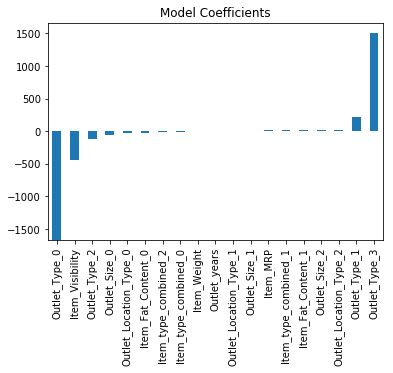

In [143]:
coef2.plot(kind='bar', title='Model Coefficients')

In [144]:
pred = alg2.predict(predictors_test)

In [145]:
test['Item_Outlet_Sales'] = pred
test.to_csv("RidgeReg.csv", columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],index = False)


In [146]:
from sklearn.tree import DecisionTreeRegressor

In [159]:
# 
alg3 = DecisionTreeRegressor(max_depth= 50, min_samples_leaf= 10)
alg3.fit(predictors,z)
train_predictions = alg3.predict(predictors)
## Perform cross validation
cv_score = cross_validation.cross_val_score(alg3, predictors,z, cv =20, scoring = 'mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
## Print model report
print ("\nModel Report")
RMSE = np.sqrt(metrics.mean_squared_error(z.values,train_predictions))
print(RMSE)
    

C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\l


Model Report
1058.4978047


C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


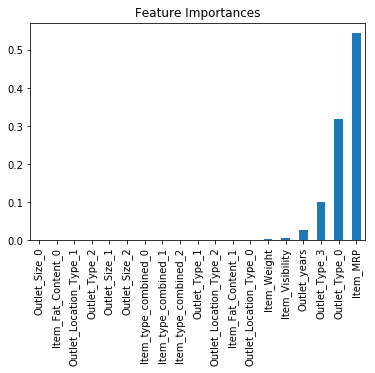

In [160]:
predictors1 = [x for x in predictors.columns]
coef2 = pd.Series(alg3.feature_importances_, predictors1).sort_values()
coef2.plot(kind = 'Bar',title = 'Feature Importances')


In [161]:
pred = alg3.predict(predictors_test)
test['Item_Outlet_Sales'] = pred
test.to_csv("DecTree1.csv", columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],index = False)



In [162]:
## 4. RandomForest

from sklearn.ensemble import RandomForestRegressor


In [166]:
# 
alg4 = RandomForestRegressor(n_estimators=200,max_depth= 15, min_samples_leaf=10,n_jobs=4)
alg4.fit(predictors,z)
train_predictions = alg4.predict(predictors)
## Perform cross validation
cv_score = cross_validation.cross_val_score(alg4, predictors,z, cv =20, scoring = 'mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
## Print model report
print ("\nModel Report")
RMSE = np.sqrt(metrics.mean_squared_error(z.values,train_predictions))
print(RMSE)
    

C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\sreeram\Anaconda3\l


Model Report
925.873021605


C:\Users\sreeram\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


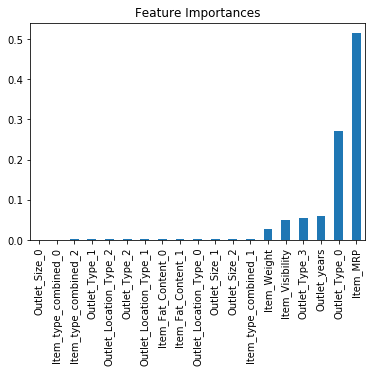

In [167]:
predictors1 = [x for x in predictors.columns]
coef2 = pd.Series(alg4.feature_importances_, predictors1).sort_values()
coef2.plot(kind = 'Bar',title = 'Feature Importances')


In [168]:
pred = alg4.predict(predictors_test)
test['Item_Outlet_Sales'] = pred
test.to_csv("RandomForest1.csv", columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],index = False)



In [ ]:
## Free to try any other Regression methods